In [1]:
import pandas as pd
import numpy as np
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import random

In [2]:
def Leggi_File_Excel(url, sheet_name = 0):

    response = requests.get(url)
    response.raise_for_status()

    excel_file = BytesIO(response.content)
    df = pd.read_excel(excel_file, sheet_name = sheet_name)

    return df


In [3]:

def Errore_I(I):

    Err_I = (0.6/100)*I + 0.01
    return Err_I

def Errore_V(V):

    Err_V = (0.3/100) * V + 0.1
    return Err_V

def CoP_Ideale(T_F, T_C):

    delta_T = np.abs(T_C - T_F)
    cop = T_F/ delta_T
    return cop

def CoP_Reale(T_F, T_C, S, h, I, V, Lambda = 1.5):

    delta_T = delta_T = np.abs(T_C - T_F)
    cop = (Lambda * delta_T * S)/(I * V * h)
    return cop

def Celsius_to_Kelvin(T):

    return T + 273.15
"""
def Err_CoP_Ideale_2(T_C, T_F, Err_C = 1, Err_F = 1):

    dC_c = T_C/((T_C - T_F)**2)
    dC_F = T_F/((T_C - T_F)**2)

    d_C = np.sqrt((dC_c*Err_C)**2 + (dC_F* Err_F)**2)
    return d_C
"""
def Err_CoP_Ideale(T_F, T_C, Err_T_F = 1, Err_T_C = 1):

    Z = T_C/T_F
    
    print(f"Z: {Z}")
    
    Err_Z = np.sqrt((Err_T_C/np.abs(T_C))**2 + (Err_T_F/np.abs(T_F))**2) * Z

    #print(f"Errore Su Z: {Err_Z}")
    
    Err_CoP_I = (1/(Z -1)**2) * Err_Z
    #print(f"Errore Cop I: {Err_CoP_I}")
    return Err_CoP_I

def Err_CoP_Reale(T_F, T_C, S, h, I, V, inc_S, Lambda = 1.5):

    Delta_T = T_C - T_F

    Err_DT = np.sqrt((1)**2 + (1)**2)

    inc_T = Err_DT/np.abs(Delta_T)

    Err_h = 0.05/1000
    
    inc_h = (Err_h/h)

    Err_I = Errore_I(I)

    inc_I = Err_I/I

    Err_V = Errore_V(V)

    inc_V = Err_V/V 

    CoP_R = CoP_Reale(T_F, T_C, S, h, I, V)

    #print(f"Incertezza di I: {inc_I}\nIncertezza di V: {inc_V}\nIncertezza h: {inc_h}\n Incertezza di T\nCoP Reale: {CoP_R} ")
    #print(f"Somma delle incertezze: {((inc_T)**2 + (inc_h)**2 + (inc_I)**2 + (inc_V)**2)}")
    Err_CoP_R = np.sqrt((inc_T**2) + (inc_S)**2 + (inc_h)**2 + (inc_I)**2 + (inc_V)**2) * CoP_R

    return Err_CoP_R

def Errore_S(L1, L2):

    Err_L = 0.05/1000
    
    inc_S = (Err_L/L1)**2 + (Err_L/L2)**2 
    
    #print(f"\n\nIncertezza S: {inc_S}\n\n")
    Err_S = inc_S * (L1 * L2)

    return Err_S, inc_S



In [13]:
Voltaggi = np.array([])
Temperature = np.array([])

Err_Voltaggi = np.array([])
Err_Temperature = np.array([])

# Prima Configurazione (Piastra Grande)



I: [0.18 0.35 0.56 0.77 0.95 1.16 1.35 1.53 1.7  1.85]
V: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Temperatura Calda: [294.75 296.95 296.85 296.55 297.05 297.85 299.25 301.25 303.55 305.55]
Temperatura Fredda: [288.25 287.25 282.45 279.35 277.15 275.55 274.85 275.35 276.05 277.85]
Lato Maggiore: 0.0405
Lato Minore: 0.0405
Altezza: 0.0036


Z: [1.02254987 1.03376849 1.05098247 1.06157151 1.07180227 1.08092905
 1.0887757  1.0940621  1.09961963 1.09969408]


Prova[array([6.1416366 , 1.51093156, 0.63438057, 0.34344766, 0.22262335,
       0.15195097, 0.11203422, 0.0864289 , 0.06924785, 0.05696221])]


Lista: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.  1.  2.  3.  4.  5.  6.  7.  8.
  9. 10.]


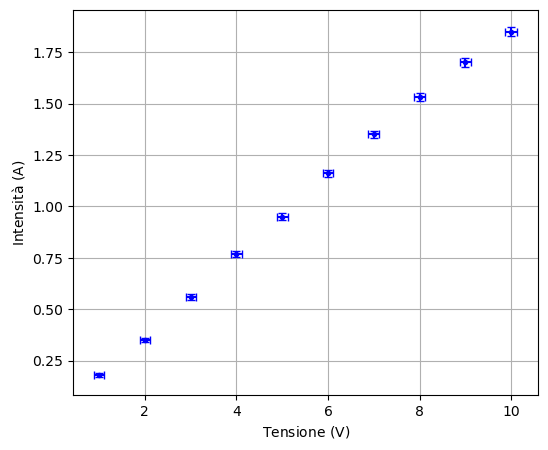

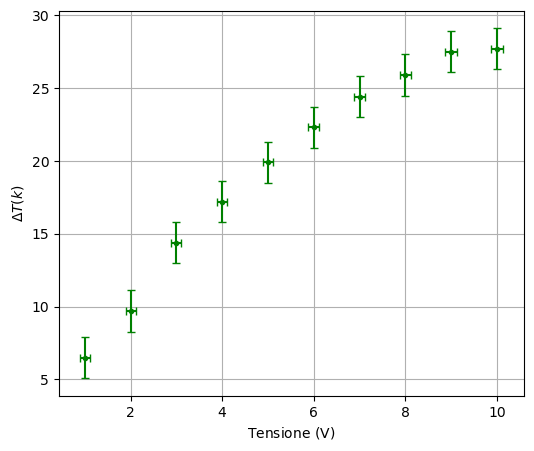

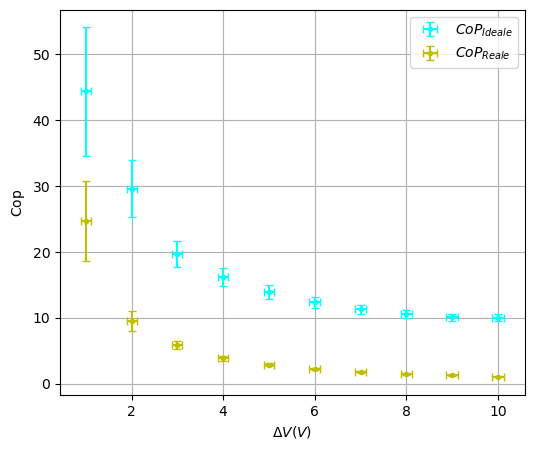

In [16]:

CoP_Ideale_V = []
CoP_Reale_V = []
Err_CoP_Reale_V = []
Err_CoP_Ideale_V = []

url = "https://unipa-my.sharepoint.com/:x:/g/personal/mattia_tarantino02_you_unipa_it/IQBUAZ1jVemtToTrESZVFeo1AWY-jCOQX7l_9kQ2b6CzGaU?download=1"
df = Leggi_File_Excel(url, 0)

Col_1 = "I"
Col_2 = "V"
Col_3 = "TC"
Col_4 = "TF"
Col_5 = "L1"
Col_6 = "L2"
Col_7 = "h"

Intensita = df[Col_1].to_numpy()
Intensita = Intensita[~np.isnan(Intensita)]

Voltaggio = df[Col_2].to_numpy()
Voltaggio = Voltaggio[~np.isnan(Voltaggio)]

T_Caldo = df[Col_3].to_numpy()
T_Caldo = T_Caldo[~np.isnan(T_Caldo)]

T_Freddo = df[Col_4].to_numpy()
T_Freddo = T_Freddo[~np.isnan(T_Freddo)]

L1 = df[Col_5].to_numpy()[1]
L2 = df[Col_6].to_numpy()[1]
Altezza = df[Col_7].to_numpy()[1]

Intensita = Intensita[::2]
Voltaggio = Voltaggio[::2]

T_Caldo = T_Caldo[::2]
T_Freddo = T_Freddo[::2]

T_Caldo = Celsius_to_Kelvin(T_Caldo)
T_Freddo = Celsius_to_Kelvin(T_Freddo)


print(f"\n\nI: {Intensita}\nV: {Voltaggio}\nTemperatura Calda: {T_Caldo}\nTemperatura Fredda: {T_Freddo}\nLato Maggiore: {L1}\nLato Minore: {L2}\nAltezza: {Altezza}\n\n")

S = L1 * L2

Err_S, inc_S = Errore_S(L1, L2)

#print(inc_S)

cop_i = CoP_Ideale(T_Freddo, T_Caldo)
CoP_Ideale_V.append(cop_i)

Err_CoP_i = Err_CoP_Ideale(T_Freddo, T_Caldo)
Err_CoP_Ideale_V.append(Err_CoP_i)

cop_r = CoP_Reale( T_Freddo, T_Caldo, S, Altezza, Intensita, Voltaggio)
CoP_Reale_V.append(cop_r)

Err_CoP_R = Err_CoP_Reale(T_Freddo, T_Caldo, S, Altezza, Intensita, Voltaggio, inc_S)
Err_CoP_Reale_V.append(Err_CoP_R)

print(f"\n\nProva{Err_CoP_Reale_V}\n\n")

delta_T = np.abs(T_Caldo - T_Freddo)


Err_I = Errore_I(Intensita)

Err_V = Errore_V(Voltaggio)

Voltaggi = np.append(Voltaggio, Voltaggi)
print(f"Lista: {Voltaggi}")

#print(f"Errore del cop Reale: {Err_CoP_R}")

fig , ax = plt.subplots(figsize = (6,5))

ax.errorbar(Voltaggio, Intensita, xerr = Err_V, yerr = Err_I, fmt = '.', color = 'b', capsize = 3)
#ax.plot(Voltaggio, Intensita, color = 'r')
ax.set_xlabel(r'$\text{Tensione (V)}$')
ax.set_ylabel(r'$\text{Intensità (A)}$')
ax.grid(True)

fig.savefig("I in funzione di V(1-a config).png", dpi = 300, bbox_inches = 'tight')

fig, ax = plt.subplots(figsize = (6,5))
ax.errorbar(Voltaggio, delta_T, xerr = Err_V, yerr = np.sqrt(2), fmt = '.', color = 'g' , capsize = 3)
ax.set_xlabel(r'$\text{Tensione (V)}$')
ax.set_ylabel(r'$\Delta T(k)$')
ax.grid(True)

fig.savefig("Delta T in funzione di V (1-a config).png", dpi = 300, bbox_inches = 'tight')

fig, ax = plt.subplots(figsize = (6,5))
#ax.plot(delta_T, cop_i, color = '#0f0f00')
#ax.plot(delta_T, cop_r, color = '#f0f000')
ax.errorbar(Voltaggio, cop_i, xerr = Err_V, yerr = Err_CoP_i, fmt = '.', color = '#00ffff' , capsize = 3, label = r'$CoP_{Ideale}$')
ax.errorbar(Voltaggio, cop_r, xerr = Err_V, yerr = Err_CoP_R, fmt = '.', color = 'y' , capsize = 3, label = r'$CoP_{Reale}$')
ax.set_ylabel(r'$\text{Cop}$')
ax.set_xlabel(r'$\Delta V(V)$')
ax.legend()
ax.grid(True)
plt.show()

fig.savefig("Confronto Tra i cop(1-a config).png", dpi = 300, bbox_inches = 'tight')

# Seconda Configurazione (Piastra Piccola)



I: [0.18 0.38 0.56 0.74 0.91 1.06 1.21 1.34 1.46 1.56]
V: [ 1  2  3  4  5  6  7  8  9 10]
Temperatura Calda: [289.85 290.35 291.25 292.75 295.65 298.25 301.85 306.15 310.65 316.25]
Temperatura Fredda: [285.25 281.95 280.15 279.15 279.65 282.05 284.35 287.75 291.75 296.45]
Lato Maggiore: 0.0405
Lato Minore: 0.0405
Altezza: 0.0036


Z: [1.01612621 1.02979252 1.03962163 1.04871933 1.05721438 1.05743662
 1.06154387 1.0639444  1.06478149 1.06679035]


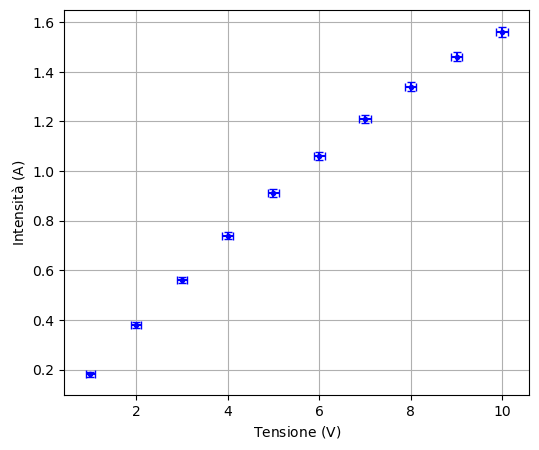

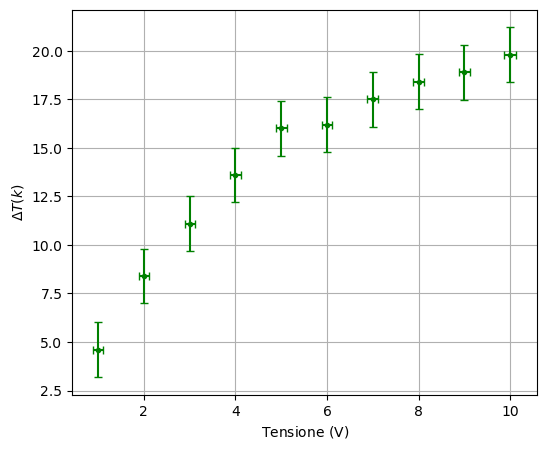

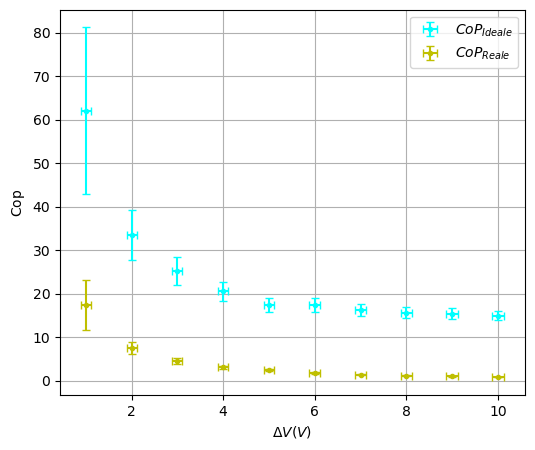

In [5]:
url = "https://unipa-my.sharepoint.com/:x:/g/personal/mattia_tarantino02_you_unipa_it/IQBUAZ1jVemtToTrESZVFeo1AWY-jCOQX7l_9kQ2b6CzGaU?download=1"
df = Leggi_File_Excel(url, 1)

Col_1 = "I"
Col_2 = "V"
Col_3 = "TC"
Col_4 = "TF"
Col_5 = "L1"
Col_6 = "L2"
Col_7 = "h"

Intensita = df[Col_1].to_numpy()
Intensita = Intensita[~np.isnan(Intensita)]

Voltaggio = df[Col_2].to_numpy()
Voltaggio = Voltaggio[~np.isnan(Voltaggio)]

T_Caldo = df[Col_3].to_numpy()
T_Caldo = T_Caldo[~np.isnan(T_Caldo)]

T_Freddo = df[Col_4].to_numpy()
T_Freddo = T_Freddo[~np.isnan(T_Freddo)]

L1 = df[Col_5].to_numpy()[1]
L2 = df[Col_6].to_numpy()[1]
Altezza = df[Col_7].to_numpy()[1]


T_Caldo = Celsius_to_Kelvin(T_Caldo)
T_Freddo = Celsius_to_Kelvin(T_Freddo)


print(f"\n\nI: {Intensita}\nV: {Voltaggio}\nTemperatura Calda: {T_Caldo}\nTemperatura Fredda: {T_Freddo}\nLato Maggiore: {L1}\nLato Minore: {L2}\nAltezza: {Altezza}\n\n")

S = L1 * L2

Err_S, inc_S = Errore_S(L1, L2)

#print(inc_S)

cop_i = CoP_Ideale(T_Freddo, T_Caldo)
CoP_Ideale_V.append(cop_i)

Err_CoP_i = Err_CoP_Ideale(T_Freddo, T_Caldo)
Err_CoP_Ideale_V.append(Err_CoP_i)

cop_r = CoP_Reale( T_Freddo, T_Caldo, S, Altezza, Intensita, Voltaggio)
CoP_Reale_V.append(cop_r)

Err_CoP_R = Err_CoP_Reale(T_Freddo, T_Caldo, S, Altezza, Intensita, Voltaggio, inc_S)
Err_CoP_Reale_V.append(Err_CoP_R)


delta_T = np.abs(T_Caldo - T_Freddo)

Err_I = Errore_I(Intensita)

Err_V = Errore_V(Voltaggio)

#print(f"Errore del cop Reale: {Err_CoP_R}")

fig , ax = plt.subplots(figsize = (6,5))

ax.errorbar(Voltaggio, Intensita, xerr = Err_V, yerr = Err_I, fmt = '.', color = 'b', capsize = 3)
#ax.plot(Voltaggio, Intensita, color = 'r')
ax.set_xlabel(r'$\text{Tensione (V)}$')
ax.set_ylabel(r'$\text{Intensità (A)}$')
ax.grid(True)

fig.savefig("I in funzione di V (2-a config).png", dpi = 300, bbox_inches = 'tight')

fig, ax = plt.subplots(figsize = (6,5))
ax.errorbar(Voltaggio, delta_T, xerr = Err_V, yerr = np.sqrt(2), fmt = '.', color = 'g' , capsize = 3)
ax.set_xlabel(r'$\text{Tensione (V)}$')
ax.set_ylabel(r'$\Delta T(k)$')
ax.grid(True)

fig.savefig("Delta T in funzione di V(2-a config).png", dpi = 300, bbox_inches = 'tight')

fig, ax = plt.subplots(figsize = (6,5))
#ax.plot(delta_T, cop_i, color = '#0f0f00')
#ax.plot(delta_T, cop_r, color = '#f0f000')
ax.errorbar(Voltaggio, cop_i, xerr = Err_V, yerr = Err_CoP_i, fmt = '.', color = '#00ffff' , capsize = 3, label = r'$CoP_{Ideale}$')
ax.errorbar(Voltaggio, cop_r, xerr = Err_V, yerr = Err_CoP_R, fmt = '.', color = 'y' , capsize = 3, label = r'$CoP_{Reale}$')
ax.set_ylabel(r'$\text{Cop}$')
ax.set_xlabel(r'$\Delta V(V)$')
ax.legend()
#ax.set_xlim(3,9)
ax.grid(True)
plt.show()

fig.savefig("Confronto Tra i cop(2-a config).png", dpi = 300, bbox_inches = 'tight')

# Terza Configurazione (Piastra Piccola + Ventola)



I: [0.16 0.34 0.53 0.71 0.89 1.05 1.21 1.34 1.46 1.59]
V: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Temperatura Calda: [296.75 295.85 296.05 296.85 298.35 300.25 302.65 304.95 308.35 310.95]
Temperatura Fredda: [292.85 289.15 286.75 285.85 285.75 286.25 287.35 288.75 291.25 293.95]
Lato Maggiore: 0.0405
Lato Minore: 0.0405
Altezza: 0.0036


Z: [1.0133174  1.02317136 1.03243243 1.03848172 1.04409449 1.0489083
 1.05324517 1.0561039  1.05871245 1.05783296]


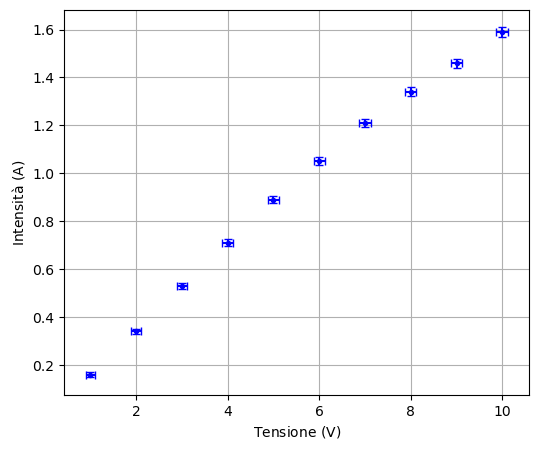

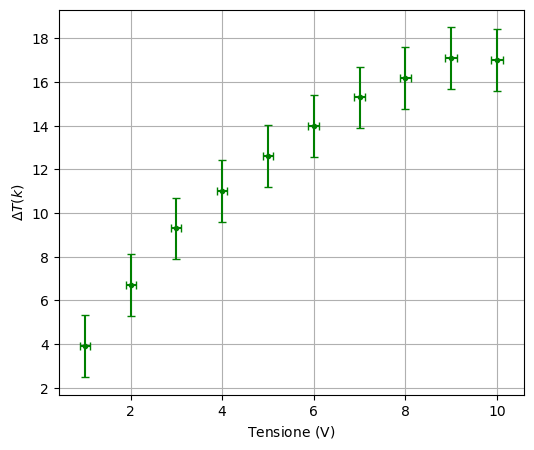

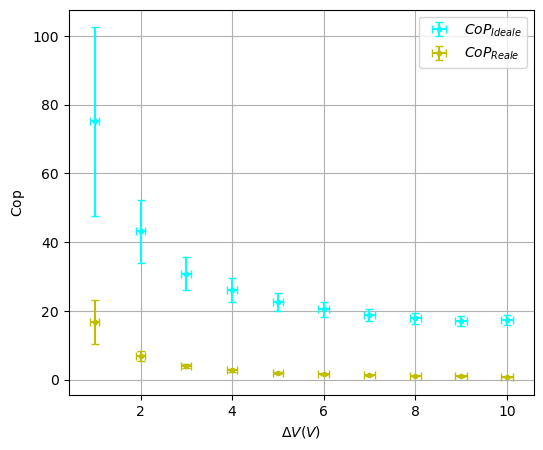

In [6]:
url = "https://unipa-my.sharepoint.com/:x:/g/personal/mattia_tarantino02_you_unipa_it/IQBUAZ1jVemtToTrESZVFeo1AWY-jCOQX7l_9kQ2b6CzGaU?download=1"
df = Leggi_File_Excel(url, 2)

Col_1 = "I"
Col_2 = "V"
Col_3 = "TC"
Col_4 = "TF"
Col_5 = "L1"
Col_6 = "L2"
Col_7 = "h"

Intensita = df[Col_1].to_numpy()
Intensita = Intensita[~np.isnan(Intensita)]

Voltaggio = df[Col_2].to_numpy()
Voltaggio = Voltaggio[~np.isnan(Voltaggio)]

T_Caldo = df[Col_3].to_numpy()
T_Caldo = T_Caldo[~np.isnan(T_Caldo)]

T_Freddo = df[Col_4].to_numpy()
T_Freddo = T_Freddo[~np.isnan(T_Freddo)]

L1 = df[Col_5].to_numpy()[1]
L2 = df[Col_6].to_numpy()[1]
Altezza = df[Col_7].to_numpy()[1]

T_Caldo = Celsius_to_Kelvin(T_Caldo)
T_Freddo = Celsius_to_Kelvin(T_Freddo)


print(f"\n\nI: {Intensita}\nV: {Voltaggio}\nTemperatura Calda: {T_Caldo}\nTemperatura Fredda: {T_Freddo}\nLato Maggiore: {L1}\nLato Minore: {L2}\nAltezza: {Altezza}\n\n")

S = L1 * L2

Err_S, inc_S = Errore_S(L1, L2)

#print(inc_S)

cop_i = CoP_Ideale(T_Freddo, T_Caldo)
CoP_Ideale_V.append(cop_i)

Err_CoP_i = Err_CoP_Ideale(T_Freddo, T_Caldo)
Err_CoP_Ideale_V.append(Err_CoP_i)

cop_r = CoP_Reale( T_Freddo, T_Caldo, S, Altezza, Intensita, Voltaggio)
CoP_Reale_V.append(cop_r)

Err_CoP_R = Err_CoP_Reale(T_Freddo, T_Caldo, S, Altezza, Intensita, Voltaggio, inc_S)
Err_CoP_Reale_V.append(Err_CoP_R)


delta_T = np.abs(T_Caldo - T_Freddo)

Err_I = Errore_I(Intensita)

Err_V = Errore_V(Voltaggio)

#print(f"Errore del cop Reale: {Err_CoP_R}")

fig , ax = plt.subplots(figsize = (6,5))

ax.errorbar(Voltaggio, Intensita, xerr = Err_V, yerr = Err_I, fmt = '.', color = 'b', capsize = 3)
#ax.plot(Voltaggio, Intensita, color = 'r')
ax.set_xlabel(r'$\text{Tensione (V)}$')
ax.set_ylabel(r'$\text{Intensità (A)}$')
ax.grid(True)

fig.savefig("I in funzione di V(3-a config).png", dpi = 300, bbox_inches = 'tight')

fig, ax = plt.subplots(figsize = (6,5))
ax.errorbar(Voltaggio, delta_T, xerr = Err_V, yerr = np.sqrt(2), fmt = '.', color = 'g' , capsize = 3)
ax.set_xlabel(r'$\text{Tensione (V)}$')
ax.set_ylabel(r'$\Delta T(k)$')
ax.grid(True)

fig.savefig("Delta T in funzione di V(3-a config).png", dpi = 300, bbox_inches = 'tight')

fig, ax = plt.subplots(figsize = (6,5))
#ax.plot(delta_T, cop_i, color = '#0f0f00')
#ax.plot(delta_T, cop_r, color = '#f0f000')
ax.errorbar(Voltaggio, cop_i, xerr = Err_V, yerr = Err_CoP_i, fmt = '.', color = '#00ffff' , capsize = 3, label = r'$CoP_{Ideale}$')
ax.errorbar(Voltaggio, cop_r, xerr = Err_V, yerr = Err_CoP_R, fmt = '.', color = 'y' , capsize = 3, label = r'$CoP_{Reale}$')
ax.set_ylabel(r'$\text{Cop}$')
ax.set_xlabel(r'$\Delta V(V)$')
ax.legend()
ax.grid(True)
plt.show()

fig.savefig("Confronto Tra i cop(3-a config).png", dpi = 300, bbox_inches = 'tight')

# Quarta Configurazione (Piastra Grande + Ventola)



I: [0.18 0.38 0.55 0.76 0.95 1.14 1.33 1.52 1.7  1.87]
V: [ 1  2  3  4  5  6  7  8  9 10]
Temperatura Calda: [292.25 292.45 292.45 292.65 293.05 293.55 294.25 295.15 296.25 297.45]
Temperatura Fredda: [287.85 284.15 281.65 279.25 277.35 276.15 275.35 275.35 276.25 276.35]
Lato Maggiore: 0.0405
Lato Minore: 0.0405
Altezza: 0.0036


Z: [1.01528574 1.02920992 1.03834546 1.04798568 1.05660718 1.06300923
 1.06863991 1.07190848 1.07239819 1.07635245]


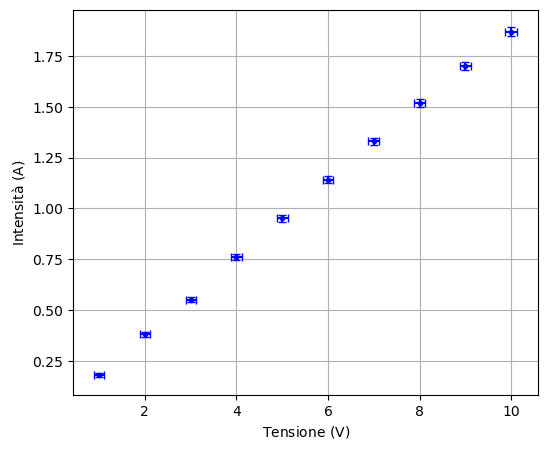

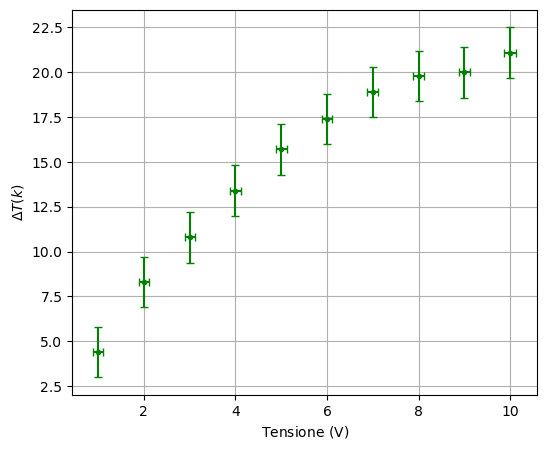

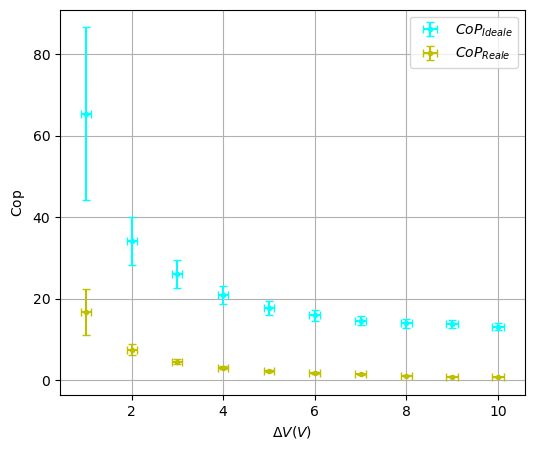

In [7]:
url = "https://unipa-my.sharepoint.com/:x:/g/personal/mattia_tarantino02_you_unipa_it/IQBUAZ1jVemtToTrESZVFeo1AWY-jCOQX7l_9kQ2b6CzGaU?download=1"
df = Leggi_File_Excel(url, 3)

Col_1 = "I"
Col_2 = "V"
Col_3 = "TC"
Col_4 = "TF"
Col_5 = "L1"
Col_6 = "L2"
Col_7 = "h"

Intensita = df[Col_1].to_numpy()
Intensita = Intensita[~np.isnan(Intensita)]

Voltaggio = df[Col_2].to_numpy()
Voltaggio = Voltaggio[~np.isnan(Voltaggio)]

T_Caldo = df[Col_3].to_numpy()
T_Caldo = T_Caldo[~np.isnan(T_Caldo)]

T_Freddo = df[Col_4].to_numpy()
T_Freddo = T_Freddo[~np.isnan(T_Freddo)]

L1 = df[Col_5].to_numpy()[0]
L2 = df[Col_6].to_numpy()[0]
Altezza = df[Col_7].to_numpy()[0]

T_Caldo = Celsius_to_Kelvin(T_Caldo)
T_Freddo = Celsius_to_Kelvin(T_Freddo)


print(f"\n\nI: {Intensita}\nV: {Voltaggio}\nTemperatura Calda: {T_Caldo}\nTemperatura Fredda: {T_Freddo}\nLato Maggiore: {L1}\nLato Minore: {L2}\nAltezza: {Altezza}\n\n")

S = L1 * L2

Err_S, inc_S = Errore_S(L1, L2)

#print(inc_S)

cop_i = CoP_Ideale(T_Freddo, T_Caldo)
CoP_Ideale_V.append(cop_i)

Err_CoP_i = Err_CoP_Ideale(T_Freddo, T_Caldo)
Err_CoP_Ideale_V.append(Err_CoP_i)

cop_r = CoP_Reale( T_Freddo, T_Caldo, S, Altezza, Intensita, Voltaggio)
CoP_Reale_V.append(cop_r)

Err_CoP_R = Err_CoP_Reale(T_Freddo, T_Caldo, S, Altezza, Intensita, Voltaggio, inc_S)
Err_CoP_Reale_V.append(Err_CoP_R)



delta_T = np.abs(T_Caldo - T_Freddo)

Err_I = Errore_I(Intensita)

Err_V = Errore_V(Voltaggio)

#print(f"Errore del cop Reale: {Err_CoP_R}")

fig , ax = plt.subplots(figsize = (6,5))

ax.errorbar(Voltaggio, Intensita, xerr = Err_V, yerr = Err_I, fmt = '.', color = 'b', capsize = 3)
#ax.plot(Voltaggio, Intensita, color = 'r')
ax.set_xlabel(r'$\text{Tensione (V)}$')
ax.set_ylabel(r'$\text{Intensità (A)}$')
ax.grid(True)

fig.savefig("I in funzione di V(4-a config).png", dpi = 300, bbox_inches = 'tight')

fig, ax = plt.subplots(figsize = (6,5))
ax.errorbar(Voltaggio, delta_T, xerr = Err_V, yerr = np.sqrt(2), fmt = '.', color = 'g' , capsize = 3)
ax.set_xlabel(r'$\text{Tensione (V)}$')
ax.set_ylabel(r'$\Delta T(k)$')
ax.grid(True)

fig.savefig("Delta T in funzione di V(4-a config).png", dpi = 300, bbox_inches = 'tight')

fig, ax = plt.subplots(figsize = (6,5))
#ax.plot(delta_T, cop_i, color = '#0f0f00')
#ax.plot(delta_T, cop_r, color = '#f0f000')
ax.errorbar(Voltaggio, cop_i, xerr = Err_V, yerr = Err_CoP_i, fmt = '.', color = '#00ffff' , capsize = 3, label = r'$CoP_{Ideale}$')
ax.errorbar(Voltaggio, cop_r, xerr = Err_V, yerr = Err_CoP_R, fmt = '.', color = 'y' , capsize = 3, label = r'$CoP_{Reale}$')
ax.set_ylabel(r'$\text{Cop}$')
ax.set_xlabel(r'$\Delta V(V)$')
ax.legend()
ax.grid(True)
plt.show()

fig.savefig("Confronto Tra i cop(4-a config).png", dpi = 300, bbox_inches = 'tight')

# Grafici Cop

In [8]:
Err_CoP_Reale_V = np.array(Err_CoP_Reale_V)
Err_CoP_Ideale_V = np.array(Err_CoP_Ideale_V)
CoP_Reale_V = np.array(CoP_Reale_V)
CoP_Ideale_V = np.array(CoP_Ideale_V)

with open("Valori Vari.txt", "w") as fp:
    k = 0
    for i in Err_CoP_Reale_V:
        k += 1
        fp.write(f"\nErrori CoP Reale {k}-esima configurazione:\n\n")
        for j in range(len(i)):

            fp.write(f"{i[j]}\n")
    k = 0
    for i in Err_CoP_Ideale_V:
        k += 1
        fp.write(f"\nErrori CoP Ideale {k}-esima configurazione:\n\n")
        for j in range(len(i)):

            fp.write(f"{i[j]}\n")

    k = 0
    for i in CoP_Reale_V:
        k += 1
        fp.write(f"\nCoP Reale {k}-esima configurazione:\n\n")
        for j in range(len(i)):

            fp.write(f"{i[j]}\n")
    fp.close()   

In [9]:
lunghezza = 6
numero_esadecimale = ''.join(random.choices('0123456789abcdef', k=lunghezza))
print(numero_esadecimale)

01d4aa


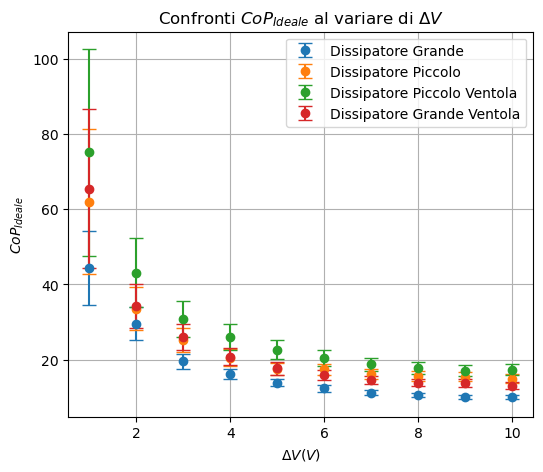

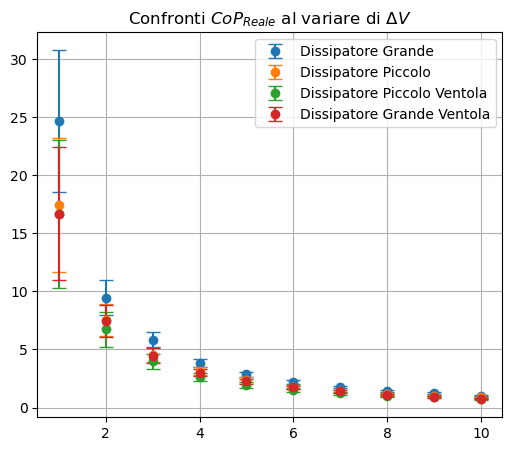

In [11]:
Config = np.array(["Dissipatore Grande", "Dissipatore Piccolo", "Dissipatore Piccolo Ventola", "Dissipatore Grande Ventola"])

fig, ax = plt.subplots(figsize = (6,5))

ax.set_title(r'Confronti ${CoP}_{Ideale}$ al variare di $\Delta V$')
ax.set_xlabel(r'$\Delta V(V)$')
ax.set_ylabel(r'$CoP_{Ideale}$')
for i in range(len(CoP_Ideale_V)):
    
    numero_esadecimale = ''.join(random.choices('0123456789abcdef', k=lunghezza))
    ax.errorbar(Voltaggio, CoP_Ideale_V[i], yerr = Err_CoP_Ideale_V[i],fmt = 'o', label = f"{Config[i]}",capsize = 5)
    ax.legend()
    ax.grid(True)
#ax.set_xlim(9.5,10.5)
#ax.set_ylim(9,20)

fig, ax = plt.subplots(figsize = (6,5))
ax.set_title(r'Confronti ${CoP}_{Reale}$ al variare di $\Delta V$')




for i in range(len(CoP_Reale_V)):
    
    numero_esadecimale = ''.join(random.choices('0123456789abcdef', k=lunghezza))
    ax.errorbar(Voltaggio, CoP_Reale_V[i], yerr = Err_CoP_Reale_V[i],fmt = 'o', label = f"{Config[i]}",capsize = 5)
    ax.legend()
    ax.grid(True)

#ax.set_xlim(9.5,10.5)
#ax.set_ylim(0.5,1.5)